# DNBLab Jupyter Notebook Tutorial

## Digitalisierte Inhaltsverzeichnisse: Datenabfrage, Auslieferung und Volltextanalyse

Dieses DNBLab-Tutorial beschreibt eine Beispielabfrage zu digitalisierten Inhaltsverzeichnissen über die SRU-Schnittstelle und umfasst das temporäre Speichern der Inhaltsverzeichnisse als Textdateien sowie die Analyse der Volltexte nach 

* [1. Häufigkeit eines beliebigen Suchwortes](#Teil1)
* [2. Vorkommen des Suchwortes in den einzelnen Textdateien](#Teil2)
* [3. Top häufigste Wörter in den Textdateien](#Teil3)


## Einrichten der Arbeitsumgebung

Um die Arbeitsumgebung für die folgenden Schritte passend einzurichten, sollten zunächst die benötigten Python-Bibliotheken importiert werden. Für Anfragen über die SRU-Schnittstelle wird BeautifulSoup https://www.crummy.com/software/BeautifulSoup/ und zur Verarbeitung der XML-Daten etree https://docs.python.org/3/library/xml.etree.elementtree.html verwendet. Mit Pandas https://pandas.pydata.org/ können Elemente aus dem MARC21-Format ausgelesen werden. In der Jupyter Notebook Umgebung kann der dokumentierte Code direkt ausgeführt und angepasst werden.

In [1]:
import requests
from bs4 import BeautifulSoup as soup
import unicodedata
from lxml import etree
import pandas as pd
from collections import Counter

## SRU-Abfrage mit Ausgabe in MARC21-xml

Die Funktion dnb_sru nimmt den Paramter "query" der SRU-Abfrage entgegen und liefert alle Ergebnisse als eine Liste von Records aus. Bei mehr als 100 Records werden weitere Datensätze mit "&startRecord=101" abgerufen (mögliche Werte 1 bis 99.000). Weitere Informationen und Funktionen der SRU- Schnittstelle werden unter https://www.dnb.de/sru beschrieben.

In [2]:
def dnb_sru(query):
    
    base_url = "https://services.dnb.de/sru/dnb"
    params = {'recordSchema' : 'MARC21-xml',
          'operation': 'searchRetrieve',
          'version': '1.1',
          'maximumRecords': '100',
          'query': query
         }
    r = requests.get(base_url, params=params)
    xml = soup(r.content)
    records = xml.find_all('record', {'type':'Bibliographic'})
    
    if len(records) < 100:
        
        return records
    
    else:
        
        num_results = 100
        i = 101
        while num_results == 100:
            
            params.update({'startRecord': i})
            r = requests.get(base_url, params=params)
            xml = soup(r.content)
            new_records = xml.find_all('record', {'type':'Bibliographic'})
            records+=new_records
            i+=100
            num_results = len(new_records)
            
        return records

## Durchsuchen eines MARC-Feldes

Die Funktion parse_records nimmt als Parameter jeweils ein Record entgegen und sucht über xpath die gewünschte Informationen heraus und liefert diese als Dictionary zurück. Die Schlüssel-Werte-Paare können beliebig agepasst und erweitert werden. In diesem Fall werden nur die Permalinks zu den digitalisierten Inhaltsverzeichnissen als "link" ausgegeben.

In [3]:
def parse_record(record):
    
    ns = {"marc":"http://www.loc.gov/MARC21/slim"}
    xml = etree.fromstring(unicodedata.normalize("NFC", str(record)))
    
    #link
    link = xml.xpath("marc:datafield[@tag = '856']/marc:subfield[@code = 'u']", namespaces=ns)
    
    try:
        link = link[0].text
    except:
        link = "unkown"
        
    meta_dict = {"link":link + '/text'}
    
    return meta_dict

Über verschiedenen Indices https://services.dnb.de/sru/dnb?operation=explain&version=1.1 kann die SRU-Abfrage "dnb_sru" mittels CQL https://www.dnb.de/DE/Service/Hilfe/Katalog/kataloghilfeExpertensuche.html eingeschränkt werden. Im Folgenden Code wird die Abfrage über das Stichwort "Sandwespe" im Volltextindex der digitalisierten Inhaltsverzeichnisse eingeschränkt. Durch Anpassen der SRU-Abfrage kann die Trefferliste beliebig geändert werden.

In [4]:
records = dnb_sru('inh=Sandwespe')
print(len(records), 'Ergebnisse')

35 Ergebnisse


## Beispielanzeige zur weiteren Bearbeitung

Mit der Bibliothek Pandas für Python wird das Ergebnis (Dictionary-Element "link") als Dataframe ausgegeben.

In [5]:
output = [parse_record(record) for record in records]
df = pd.DataFrame(output)
df

#Die Ausgabe der ermittelten Links kann je nach Bedarf über verschiedene Funktionen erfolgen:
#print(df.to_string(index=False))
#HTML(df.to_html(index=False))
#document = df.to_dict(orient='list')
#print(document)

,link
0,https://d-nb.info/1216718180/04/text
1,https://d-nb.info/1205215212/04/text
2,https://d-nb.info/1203042655/04/text
3,https://d-nb.info/1197947922/04/text
4,https://d-nb.info/1155773403/04/text
5,https://d-nb.info/1162289392/04/text
6,https://d-nb.info/113822071X/04/text
7,https://d-nb.info/1028151314/04/text
8,https://d-nb.info/1048291391/04/text
9,https://d-nb.info/1010103253/04/text


## Download der Textdateien 

Mit der folgenden Funktion df.to_csv() werden die Ergebnisse als "links.csv" in das Jupyter-Verzeichnins der Einstiegsseite abgelegt und können dort heruntergeladen werden. 

In [6]:
df.to_csv("links.csv", index=False)

Mit wget werden alle in der CSV-Datei gespeicherten Links heruntergeladen und als Textdateien (text, text.1, text.2, usw.) im temporären Jupyter-Verzeichnis gespeichert (Downloadlimit 1MB). 

In [7]:
!wget -Q1m -i links.csv

--2021-08-19 09:42:07--  http://link/
Resolving link (link)... failed: No address associated with hostname.
wget: unable to resolve host address ‘link’
--2021-08-19 09:42:07--  https://d-nb.info/1216718180/04/text
Resolving d-nb.info (d-nb.info)... 193.175.100.223
Connecting to d-nb.info (d-nb.info)|193.175.100.223|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5192 (5.1K) [text/plain]
Saving to: ‘text’

text                100%[===================>]   5.07K  --.-KB/s    in 0s      

2021-08-19 09:42:08 (88.1 MB/s) - ‘text’ saved [5192/5192]

--2021-08-19 09:42:08--  https://d-nb.info/1205215212/04/text
Reusing existing connection to d-nb.info:443.
HTTP request sent, awaiting response... 200 OK
Length: 1553 (1.5K) [text/plain]
Saving to: ‘text.1’

text.1              100%[===================>]   1.52K  --.-KB/s    in 0s      

2021-08-19 09:42:09 (117 MB/s) - ‘text.1’ saved [1553/1553]

--2021-08-19 09:42:09--  https://d-nb.info/1203042655/04/text
Reusing exi

HTTP request sent, awaiting response... 200 OK
Length: 8161 (8.0K) [text/plain]
Saving to: ‘text.23’

text.23             100%[===================>]   7.97K  --.-KB/s    in 0s      

2021-08-19 09:42:16 (158 MB/s) - ‘text.23’ saved [8161/8161]

--2021-08-19 09:42:16--  https://d-nb.info/451709578/04/text
Reusing existing connection to d-nb.info:443.
HTTP request sent, awaiting response... 200 OK
Length: 29718 (29K) [text/plain]
Saving to: ‘text.24’

text.24             100%[===================>]  29.02K  --.-KB/s    in 0.02s   

2021-08-19 09:42:17 (1.76 MB/s) - ‘text.24’ saved [29718/29718]

--2021-08-19 09:42:17--  https://d-nb.info/368150585/04/text
Reusing existing connection to d-nb.info:443.
HTTP request sent, awaiting response... 200 OK
Length: 4910 (4.8K) [text/plain]
Saving to: ‘text.25’

text.25             100%[===================>]   4.79K  --.-KB/s    in 0s      

2021-08-19 09:42:17 (102 MB/s) - ‘text.25’ saved [4910/4910]

--2021-08-19 09:42:17--  https://d-nb.info/36700

## Volltextanalyse 

### 1. Häufigkeit eines beliebigen Suchwortes<a class="anchor" id="Teil1"></a>

Die heruntergeladenen Textdateien können nach einem Suchwort, z.B. search = "biene" durchsucht werden. Hierbei wird die Groß- und Kleinschreibung beachtet.
Als Antwort wird die Häufigkeit des gesuchten Wortes in den heruntergeladenenen Textdateien ausgegeben. Dabei entspricht die Dateibenennung den im Verzeichnis heruntergeladen Textdateien (text, text1, text2 usw.).
Das Suchwort kann beliebig geändert und die Suche durch Ausführen des Codes angepasst werden.

In [8]:
from IPython.display import display 
import ipywidgets as widgets 
from ipywidgets import interact, Layout 

tb1 = widgets.Text(value = 'biene', description ='Suchwort: ');display(tb1);


# ein Button zur Übernahme der eingegebenen Werte 
button = widgets.Button(description='Übernehmen!', layout=Layout(width='200px')); 
button.style.button_color='lightgreen';display(button); 
def on_button_clicked(sender): 
    a = tb1.value; 
    print('Folgendes Suchwort wurde übernommen: ' + str(tb1.value))     
button.on_click(on_button_clicked)

Text(value='biene', description='Suchwort: ')

Button(description='Übernehmen!', layout=Layout(width='200px'), style=ButtonStyle(button_color='lightgreen'))

Folgendes Suchwort wurde übernommen: biene


In [9]:
#Einbauen einer Schleife um Dateinamen automatisch zu verarbeiten: 

def adding_name(counter):

    i = 1
    names = []

    for i in range (1, counter): 
        number = str(i)
        name = "text." + number
        names.append(name)
        i+=1
    
    return names 
    


counter = len(records)

var = adding_name(counter)
print("Folgende Textdateien wurden durchsucht: \n text", *var, sep = "\n")  #Alternativ: sep = ", "
#print(var)


search = str(tb1.value)
anzahl = 0 
anzahl2 = 0

filename = 'text'
with open(filename) as f:
    for num, line in enumerate(f, 1):
        if search in line:
            anzahl += 1
            
#Einbau der Schleife erst hier wegen des leicht anderen Formats der Dateinamen... :             
for name in var: 
    with open(name) as f:
        for num, line in enumerate(f, 1):
            if search in line:
                anzahl2 += 1


print()
print('Das Suchwort wurde', anzahl, 'Mal in der Textdatei "text" gefunden.')
print('Das Suchwort wurde', anzahl2, 'Mal in den restlichen Textdateien gefunden.')
print()
print('Insgesamt wurde das Suchwort', anzahl+anzahl2, "Mal in den zu durchsuchenden Textdateien gefunden.")

Folgende Textdateien wurden durchsucht: 
 text
text.1
text.2
text.3
text.4
text.5
text.6
text.7
text.8
text.9
text.10
text.11
text.12
text.13
text.14
text.15
text.16
text.17
text.18
text.19
text.20
text.21
text.22
text.23
text.24
text.25
text.26
text.27
text.28
text.29
text.30
text.31
text.32
text.33
text.34

Das Suchwort wurde 10 Mal in der Textdatei "text" gefunden.
Das Suchwort wurde 117 Mal in den restlichen Textdateien gefunden.

Insgesamt wurde das Suchwort 127 Mal in den zu durchsuchenden Textdateien gefunden.


### 2. Vorkommen des Suchwortes in den einzelnen Textdateien<a class="anchor" id="Teil2"></a>

Alle Treffer werden mit Angabe der Zeile und Datei ausgegeben. 


In [10]:
search = str(tb1.value)
new_file = open('Trefferliste.txt', 'w')

filename = 'text'
with open(filename) as f:
    for num, line in enumerate(f, 1):
        if search in line:
            print('Das Suchwort "%s" wurde gefunden in Zeile:' % search, num , 'in der Datei ',filename)
            text = ('Das Suchwort "%s" wurde gefunden in Zeile:' % search, num , 'in der Datei ',filename)
            new_file.write(str(text) + "\n")
            #summary.append(text)
            
            
#Einbau der Schleife erst hier wegen des leicht anderen Formats der Dateinamen... :             
for name in var: 
    with open(name) as f:
        for num, line in enumerate(f, 1):
            if search in line:
                print('Das Suchwort "%s" wurde gefunden in Zeile:' % search, num , 'in der Datei ',name) 
                text2 = ('Das Suchwort "%s" wurde gefunden in Zeile:' % search, num , 'in der Datei ',name)
                new_file.write(str(text2) + "\n")
                
new_file.close()

with open('Trefferliste.txt') as f:
    #lines = f.readlines()
    result = f.read()

Das Suchwort "biene" wurde gefunden in Zeile: 11 in der Datei  text
Das Suchwort "biene" wurde gefunden in Zeile: 13 in der Datei  text
Das Suchwort "biene" wurde gefunden in Zeile: 14 in der Datei  text
Das Suchwort "biene" wurde gefunden in Zeile: 15 in der Datei  text
Das Suchwort "biene" wurde gefunden in Zeile: 16 in der Datei  text
Das Suchwort "biene" wurde gefunden in Zeile: 17 in der Datei  text
Das Suchwort "biene" wurde gefunden in Zeile: 18 in der Datei  text
Das Suchwort "biene" wurde gefunden in Zeile: 31 in der Datei  text
Das Suchwort "biene" wurde gefunden in Zeile: 33 in der Datei  text
Das Suchwort "biene" wurde gefunden in Zeile: 43 in der Datei  text
Das Suchwort "biene" wurde gefunden in Zeile: 43 in der Datei  text.1
Das Suchwort "biene" wurde gefunden in Zeile: 29 in der Datei  text.2
Das Suchwort "biene" wurde gefunden in Zeile: 30 in der Datei  text.2
Das Suchwort "biene" wurde gefunden in Zeile: 31 in der Datei  text.2
Das Suchwort "biene" wurde gefunden in Z

### 3. Top häufigste Wörter in den Textdateien<a class="anchor" id="Teil3"></a>

In [11]:
content = []

filename = 'text'
with open(filename) as f:
    file1 = f.read()
    content.append(file1.lower())
            
#Einbau der Schleife erst hier wegen des leicht anderen Formats der Dateinamen... :             
for name in var: 
    with open(name) as f:
        morefiles = f.read()
        content.append(morefiles.lower())
        
import string

listofthings = list()

for entry in content:      
    #Remove punctuation
    for c in string.punctuation:
        entry= entry.replace(c," ")
    test = str.split(entry)
    listofthings.extend(test)
    
#Enternen der Seitenzahlen:
words = []
        
for item in listofthings: 
    if item.isdecimal() is True: 
        continue
    else: 
        words.append(item)
        
counts = Counter(words)

#Importieren der zu entfernenden Stopwörter (wie bpsw. "und", "der", etc.):

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')

stopger = stopwords.words('german')

newStopwords = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l',
              'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'vgl', '\x97', '•', '■', 'v',
               'beim', 'inhaltsverzeichnis', 'seite']

stopger.extend(newStopwords)

tokens_without_sw = [word for word in words if not word in stopger]
counts = Counter(tokens_without_sw)


[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [14]:
print(counts.most_common(20))

[('familie', 203), ('arbeitsblatt', 142), ('materialgebundene', 119), ('aufgabe', 119), ('nr', 95), ('ordnung', 81), ('gemeine', 63), ('bienen', 62), ('insekten', 54), ('unterordnung', 49), ('sandwespe', 38), ('ii', 38), ('menschen', 37), ('unterfamilie', 37), ('hebel', 36), ('vögel', 35), ('leben', 34), ('wespen', 34), ('große', 34), ('uhland', 32)]


In [15]:
df = pd.DataFrame(counts.most_common(20), columns=['Wort', 'Häufigkeit'])
df

,Wort,Häufigkeit
0,familie,203
1,arbeitsblatt,142
2,materialgebundene,119
3,aufgabe,119
4,nr,95
5,ordnung,81
6,gemeine,63
7,bienen,62
8,insekten,54
9,unterordnung,49


<AxesSubplot:title={'center':'Worthäufigkeiten'}, xlabel='Wort'>

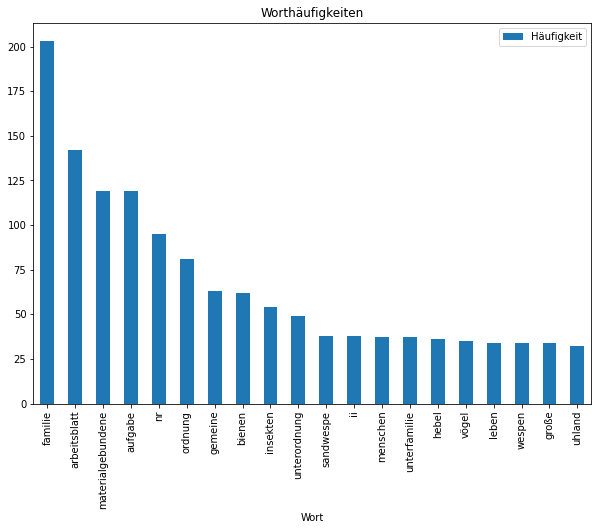

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

df.plot(kind='bar', x=0, y=1, title='Worthäufigkeiten', figsize=(10,7))